<h1>Regularization for Linear Regression</h1>

<p>Notebook for Ridge, Lasso, ElasticNet Regressions in comparison with sklearn's</p>

In [1]:
from abc import ABC, abstractmethod

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import make_regression
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.preprocessing import StandardScaler

from IPython.display import HTML
%matplotlib inline

In [2]:
class BaseRegression(ABC):
    def init_weights(self, input_shape):
        self.w = np.random.normal(0, 1, size=(input_shape, 1))
        self.b = np.random.normal(0, 1, size=(1, 1))
    
    @staticmethod
    def mse(y_true, y_pred):
        return np.mean((y_true - y_pred)**2)
    
    @staticmethod
    def mse_derivative(y_true, y_pred):
        return -2 * (y_true - y_pred) / y_true.shape[0]
    
    @abstractmethod
    def w_grad(self, x, y):
        pass
    
    def b_grad(self, x, y):
        preds = self.predict(x)
        mse_deriv = self.mse_derivative(y, preds)
        ones = np.ones((len(y), 1))
        grad = ones.T.dot(mse_deriv)
        return grad
    
    def fit(self, x, y, lr=0.01, n_iter=1000):
        self.init_weights(x.shape[1])
        for _ in range(n_iter):
            w_grad = self.w_grad(x, y)
            b_grad = self.b_grad(x, y)
            self.w -= lr * w_grad
            self.b -= lr * b_grad
            
        return self
    
    def predict(self, x):
        return x.dot(self.w) + self.b

In [3]:
class LinearRegression(BaseRegression):  
    def w_grad(self, x, y):
        preds = self.predict(x)
        mse_deriv = self.mse_derivative(y, preds)
        grad = x.T.dot(mse_deriv)
        return grad


class RidgeRegression(BaseRegression):
    def __init__(self, alpha=0):
        self.alpha = alpha
    
    def w_grad(self, x, y):
        preds = self.predict(x)
        mse_deriv = self.mse_derivative(y, preds)
        grad = x.T.dot(mse_deriv) + (2 * self.alpha * self.w) / y.shape[0]
        return grad


class LassoRegression(BaseRegression):
    def __init__(self, alpha=0):
        self.alpha = alpha

    @staticmethod
    def mse_derivative(y_true, y_pred):
        return -(y_true - y_pred) / y_true.shape[0]
    
    def w_grad(self, x, y):
        preds = self.predict(x)
        mse_deriv = self.mse_derivative(y, preds)
        grad = x.T.dot(mse_deriv) + self.alpha * np.sign(self.w)
        return grad


class ElasticNetRegression(BaseRegression):
    def __init__(self, alpha=0, l1_ratio=0):
        self.alpha = alpha
        self.l1_ratio = l1_ratio

    @staticmethod
    def mse_derivative(y_true, y_pred):
        return -(y_true - y_pred) / y_true.shape[0]
    
    def w_grad(self, x, y):
        preds = self.predict(x)
        mse_deriv = self.mse_derivative(y, preds)
        grad = x.T.dot(mse_deriv) + (self.alpha * (1 - self.l1_ratio) * self.w)\
             + self.alpha * self.l1_ratio * np.sign(self.w)
        return grad

In [4]:
x, y = make_regression(n_samples=100, n_features=50, bias=1, noise=10, n_informative=25)

scaler = StandardScaler()
x = scaler.fit_transform(x)

y = y.reshape(-1, 1)
x.shape, y.shape

((100, 50), (100, 1))

In [5]:
reg = LinearRegression()
reg.fit(x, y, n_iter=10000)

In [6]:
x_ols = np.hstack((np.ones((len(x), 1)), x))
w = np.linalg.inv(x_ols.T.dot(x_ols)).dot(x_ols.T).dot(y)
np.allclose(reg.w, w[1:])

True

In [7]:
reg_ridge = RidgeRegression(10)
reg_ridge.fit(x, y, n_iter=10000)
print(reg_ridge.b)
print(reg_ridge.w.T)

[[11.35386777]]
[[ 6.00849094e+01  6.47775547e+00  9.55531321e-01  1.37363693e+01
   1.53278626e-01 -1.07752867e+00  1.21340671e+01  8.19975676e+01
   4.97077595e+00  3.33894479e+01  5.90572791e+01  4.13766186e-01
   3.62889865e+00  1.15415824e+01  4.11496226e+01  6.39852334e+00
  -1.06072166e+01 -3.07940312e+00  2.25538432e+01  2.20142983e+01
   6.08617377e+01  7.01451214e+01 -5.62421187e+00  6.08639996e+01
   5.53537398e+00 -5.02605367e+00 -1.86425393e+00  7.04498666e-01
  -2.43335209e+00  3.53724305e+01  4.78326786e+00  4.69654599e+01
   6.65863268e+01  8.48651210e+00 -9.69967082e+00  7.75568577e+01
   3.00275620e+01  1.59656530e-01  4.29513598e+00  6.31710578e+01
  -2.10603411e-02  7.88113064e+01  1.72518178e+01  7.60064261e+01
  -1.43696030e+01  1.85604166e+01  3.96824200e+00 -9.71875938e+00
   1.60911655e+01  1.04250951e+01]]


In [8]:
ridge = Ridge(10)
ridge.fit(x, y)
print(ridge.intercept_)
print(ridge.coef_)

[11.35386777]
[[ 6.00849094e+01  6.47775547e+00  9.55531321e-01  1.37363693e+01
   1.53278626e-01 -1.07752867e+00  1.21340671e+01  8.19975676e+01
   4.97077595e+00  3.33894479e+01  5.90572791e+01  4.13766186e-01
   3.62889865e+00  1.15415824e+01  4.11496226e+01  6.39852334e+00
  -1.06072166e+01 -3.07940312e+00  2.25538432e+01  2.20142983e+01
   6.08617377e+01  7.01451214e+01 -5.62421187e+00  6.08639996e+01
   5.53537398e+00 -5.02605367e+00 -1.86425393e+00  7.04498666e-01
  -2.43335209e+00  3.53724305e+01  4.78326786e+00  4.69654599e+01
   6.65863268e+01  8.48651210e+00 -9.69967082e+00  7.75568577e+01
   3.00275620e+01  1.59656530e-01  4.29513598e+00  6.31710578e+01
  -2.10603411e-02  7.88113064e+01  1.72518178e+01  7.60064261e+01
  -1.43696030e+01  1.85604166e+01  3.96824200e+00 -9.71875938e+00
   1.60911655e+01  1.04250951e+01]]


In [9]:
np.allclose(ridge.coef_, reg_ridge.w.T)

True

In [10]:
reg_lasso = LassoRegression(alpha=3)
reg_lasso.fit(x, y, n_iter=10000)
print(reg_lasso.b)
print(reg_lasso.w.T)

[[11.35386777]]
[[ 7.27454989e+01  1.50401520e-02  2.58047618e-02  2.28564918e-02
  -4.82356495e-02 -3.49006664e-02  1.42837374e+01  8.42979732e+01
  -1.46645959e-02  3.58222263e+01  5.80939490e+01 -2.61896581e-02
   1.02140164e-02  1.34454438e+01  4.37265663e+01 -9.84761250e-03
  -2.63609410e-02 -3.29113692e-02  2.66898694e+01  2.87486113e+01
   6.49277745e+01  8.68532947e+01 -2.78910821e-02  6.81417147e+01
  -4.91826454e-03  1.52509332e-02 -3.18956161e-03 -2.32464533e-02
   2.18598845e-02  4.38457486e+01 -1.27343722e-04  5.16364702e+01
   8.32813678e+01  3.86765090e-03 -2.92669551e-02  9.19486284e+01
   1.76199853e+01  2.85765041e-02 -5.98099132e-04  7.03261684e+01
  -2.00223083e-02  8.62734584e+01  1.90039607e+01  8.59578703e+01
  -7.67537212e-01  1.88310593e+01 -1.63347950e-02  9.43886433e-04
   1.17963913e+01  1.26846263e+00]]


In [11]:
lasso = Lasso(alpha=3)
lasso.fit(x, y)
print(lasso.intercept_)
print(lasso.coef_)

[11.35386777]
[72.75680501  0.          0.          0.         -0.         -0.
 14.28936899 84.29948792 -0.         35.82679172 58.10137787 -0.
  0.         13.46240091 43.73426842  0.         -0.         -0.
 26.69607149 28.75891125 64.93922021 86.86468716 -0.         68.15321134
  0.         -0.          0.         -0.         -0.         43.84885094
  0.         51.64303573 83.29690137  0.         -0.         91.94704217
 17.60691469  0.          0.         70.33863043 -0.         86.26877225
 19.00788907 85.95771654 -0.76126976 18.83964476  0.         -0.
 11.79047134  1.25684361]


In [12]:
np.allclose(lasso.coef_, reg_lasso.w.T)

False

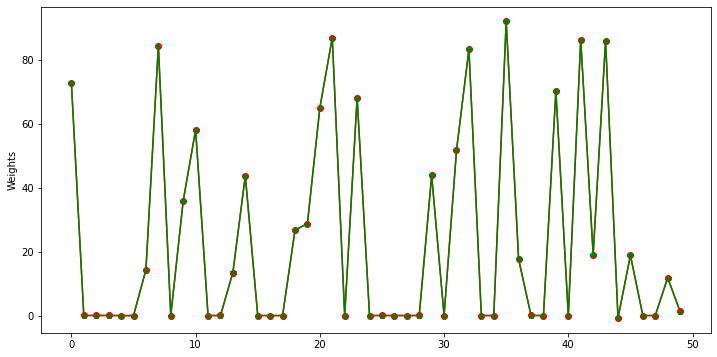

In [13]:
plt.figure(figsize=(12, 6))
plt.plot(range(len(lasso.coef_)), reg_lasso.w.ravel(), 'ro-')
plt.plot(range(len(lasso.coef_)), lasso.coef_.ravel(), 'g*-')
plt.ylabel('Weights');

In [14]:
reg_elastic = ElasticNetRegression(alpha=10, l1_ratio=0.8)
reg_elastic.fit(x, y, n_iter=10000)
print(reg_elastic.b)
print(reg_elastic.w.T)

[[11.35386777]]
[[ 1.57477702e+01  4.50881095e+00 -2.10089858e-02  7.35506345e+00
   4.66290960e-03 -2.44647685e-02 -1.30005545e+00  3.17116167e+01
  -6.01356361e-02  1.14935990e+01  2.60247661e+01 -2.62875817e+00
   1.26430151e-02  5.77560199e+00  1.29980056e+01  8.79576702e+00
  -1.20604634e+01  6.70397669e-02  1.06370459e+01  1.96383612e-02
   2.48621593e+01  2.07566533e+01 -7.92278085e-02  1.61025226e+01
   6.78439050e-01 -4.24258794e-02  4.55834963e-02 -2.20972961e+00
  -2.36660829e+00  2.44058895e+00  1.68401290e+00  1.32070969e+01
   1.72432646e+01  5.08830294e+00 -1.02009689e-02  2.78819888e+01
   1.93507534e+01 -9.68646711e-03  6.88937140e-02  2.01261975e+01
   1.76915554e-03  2.68530845e+01  7.03440828e-02  2.37807290e+01
  -1.29882028e+01  4.05200322e+00  1.63294032e-02 -5.63777336e+00
   5.49716942e+00  1.31221553e+01]]


In [15]:
elastic = ElasticNet(alpha=10, l1_ratio=0.8)
elastic.fit(x, y)
print(elastic.intercept_)
print(elastic.coef_)

[11.35386777]
[ 15.7481331    4.50801327  -0.           7.35103448   0.
  -0.          -1.3012043   31.71202697   0.          11.49835508
  26.02265985  -2.63319962   0.           5.77403406  12.99642504
   8.79540191 -12.05749155   0.          10.64380086   0.
  24.86330005  20.75336751  -0.          16.10614665   0.68425468
  -0.          -0.          -2.20186455  -2.3657577    2.4430871
   1.69243637  13.19956516  17.24398268   5.0900081   -0.
  27.88083793  19.35162569  -0.           0.          20.12554025
   0.          26.8637649    0.          23.77830946 -12.97801999
   4.05388369  -0.          -5.63233829   5.49229059  13.12228354]


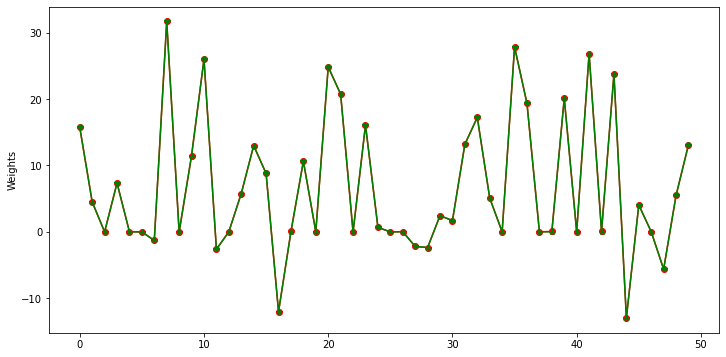

In [16]:
plt.figure(figsize=(12, 6))
plt.plot(range(len(elastic.coef_)), reg_elastic.w.ravel(), 'ro-')
plt.plot(range(len(elastic.coef_)), elastic.coef_.ravel(), 'g*-')
plt.ylabel('Weights');

In [17]:
np.allclose(elastic.coef_, reg_elastic.w.T)  # certain accuracy

False

In [18]:
with open('./style.css') as f:
    style = f.read()
HTML(style)